In [381]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2 Collect Data

In [382]:
df=pd.read_csv('/content/train.csv')
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [383]:
df.shape

(33750, 14)

# 3 EDA

<Axes: xlabel='weather_type', ylabel='count'>

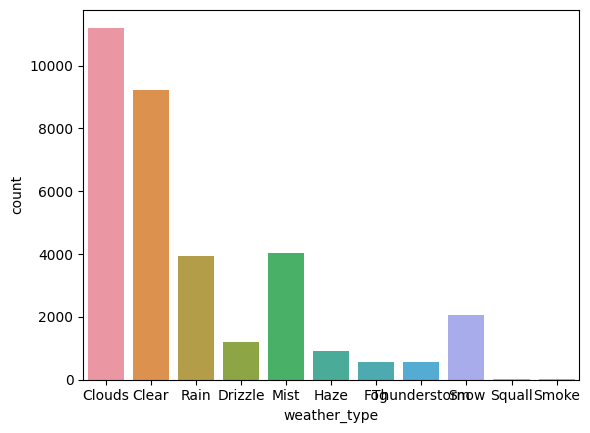

In [384]:
sns.countplot(x=df['weather_type'])

In [385]:
df.head(1)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545


In [386]:
df['weather_type'].value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

In [387]:
column=df.columns
column

Index(['date_time', 'is_holiday', 'humidity', 'wind_speed', 'wind_direction',
       'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h',
       'snow_p_h', 'clouds_all', 'weather_type', 'air_pollution_index',
       'traffic_volume'],
      dtype='object')

In [388]:
for i in column:
  print(f'{i}:{df[i].unique()}')

date_time:['2012-10-02 09:00:00' '2012-10-02 10:00:00' '2012-10-02 11:00:00' ...
 '2017-05-17 21:00:00' '2017-05-17 22:00:00' '2017-05-17 23:00:00']
is_holiday:['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
humidity:[ 89  67  66  65  64  63  62  61  60  59  58  57  56  55  48  42  33  30
  32  37  36  39  41  44  47  50  75  70  93  84  53  49  45  28  26  34
  54  71  76  35  27  25  23  24  31  52  69  80  74  38  51  79  21  43
  68  87  86  29  40  92  19  18  20  81 100  46  83  85  88  90  95  97
  91  78  82  72  77  73  94  96  98  17  22  99  15  16  14  13]
wind_speed:[ 2  3  4  5  7  6  0  1  9  8 10 12 11 13 15 14 16]
wind_direction:[329 330 328 327 326 325 324 323 322 321 320 350 340 360   0  63 126 190
 170 140 200 180 150 160 130 110 120 194 248 239 230 240 250 260 270 280
 290 275 300 310 220 210 195 253 286 217 313 3

In [389]:
df.shape

(33750, 14)

In [390]:
df.drop_duplicates()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,2017-05-17 21:00:00,None,85,1,328,7,7,287.88,0.0,0.0,90,Mist,74,2348
33746,2017-05-17 22:00:00,None,70,1,24,2,2,286.95,0.0,0.0,90,Rain,81,2194
33747,2017-05-17 22:00:00,None,70,1,24,1,1,286.95,0.0,0.0,90,Mist,138,2194
33748,2017-05-17 23:00:00,None,66,1,42,6,6,285.75,0.0,0.0,90,Rain,229,1328


In [391]:
df.shape

(33750, 14)

<Axes: xlabel='weather_type', ylabel='count'>

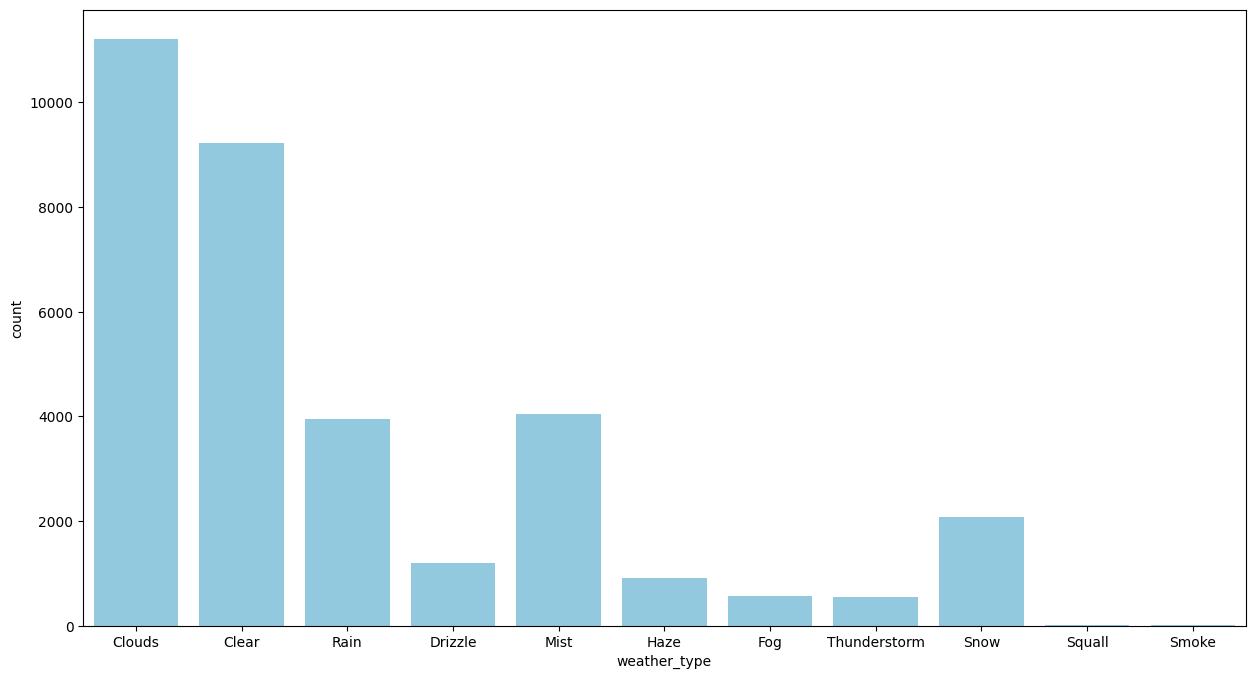

In [392]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['weather_type'],color='skyblue')

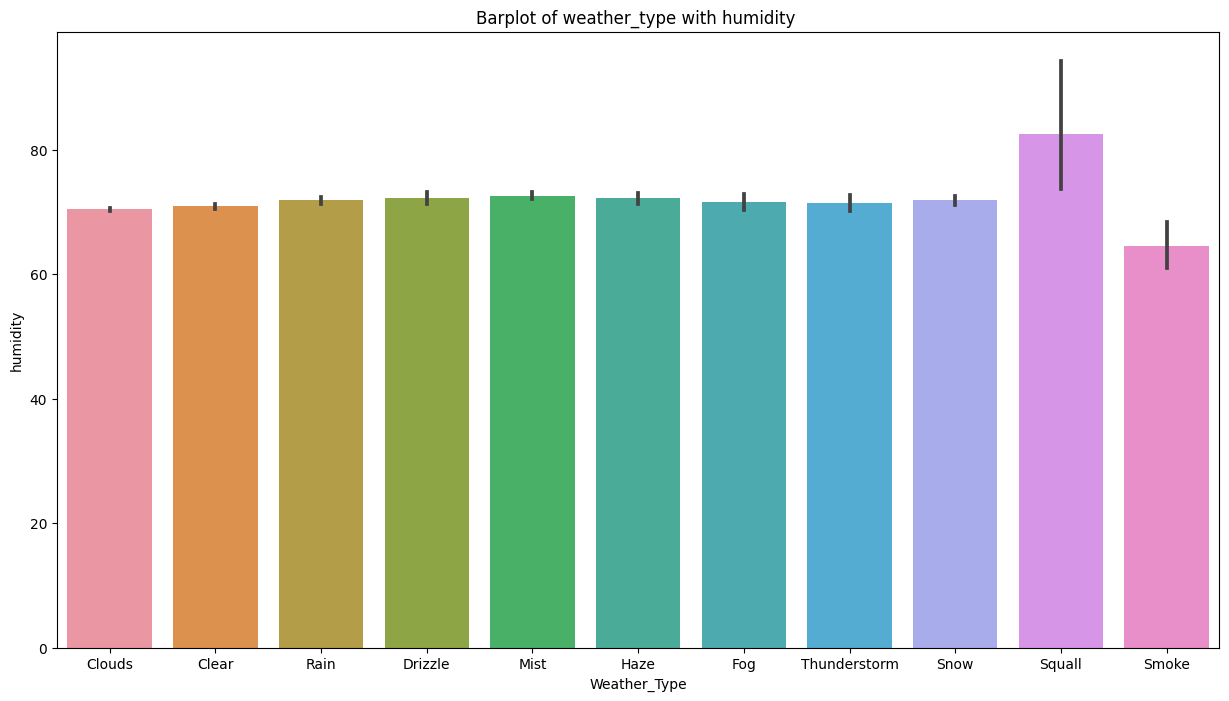

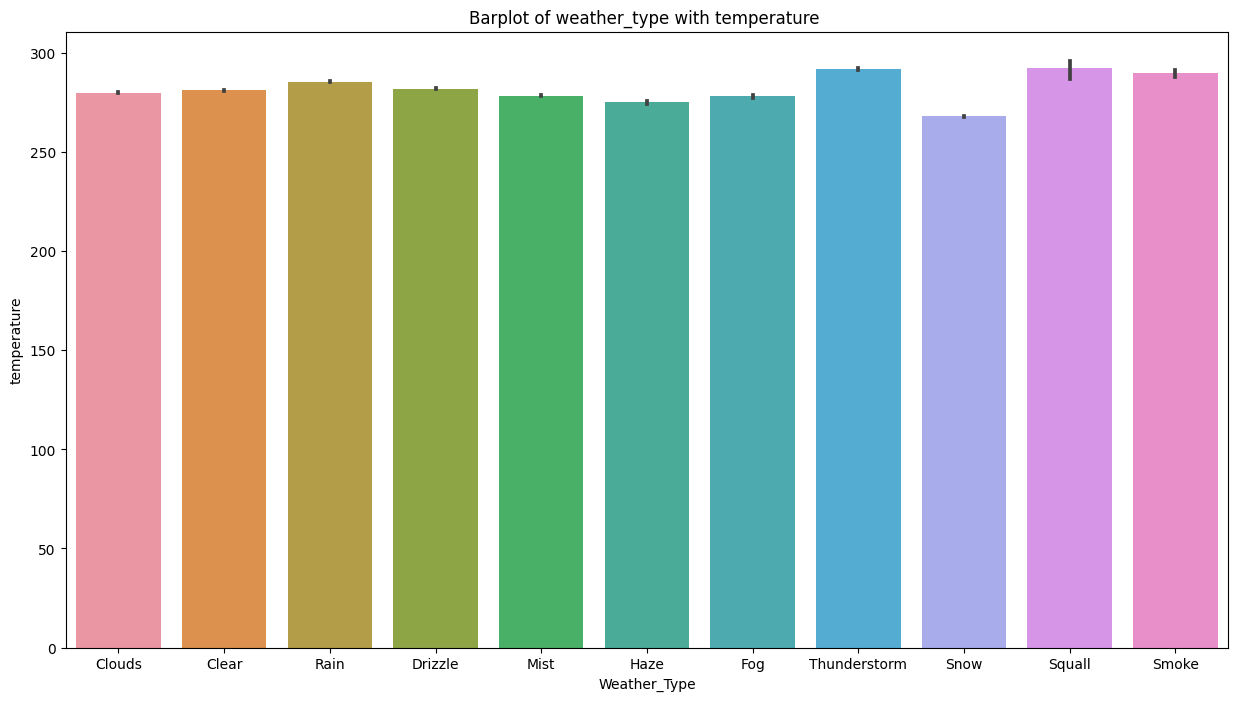

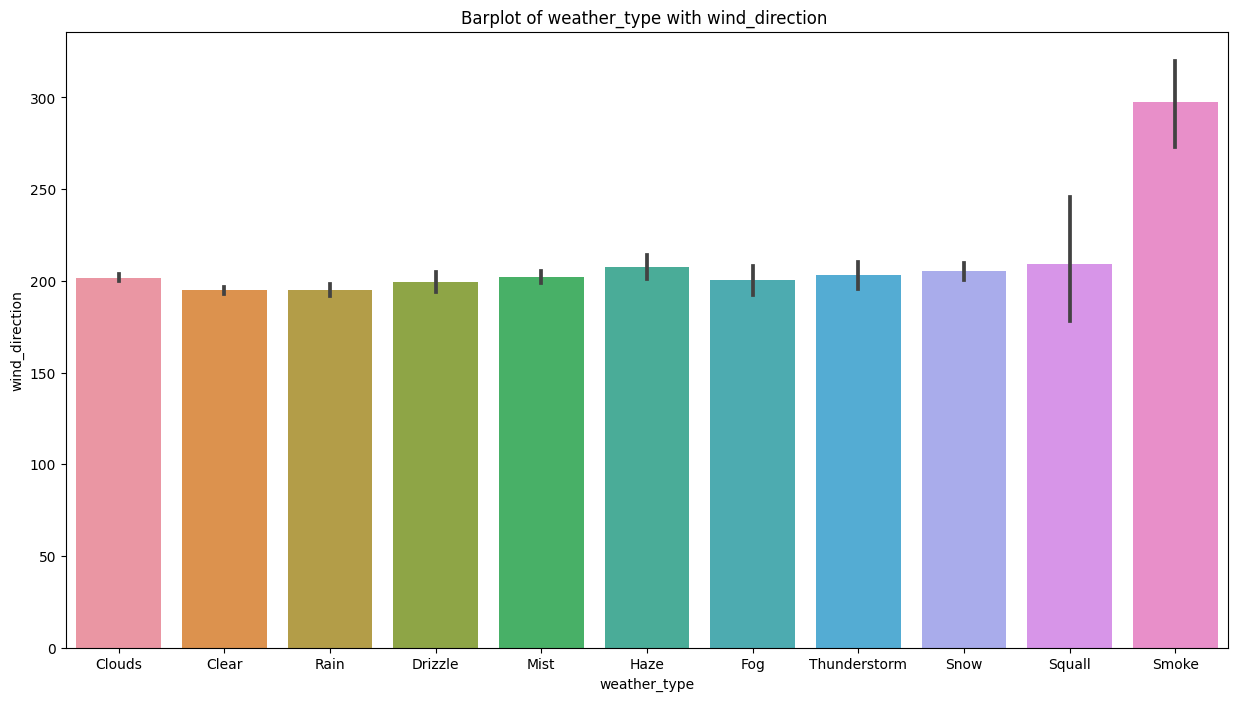

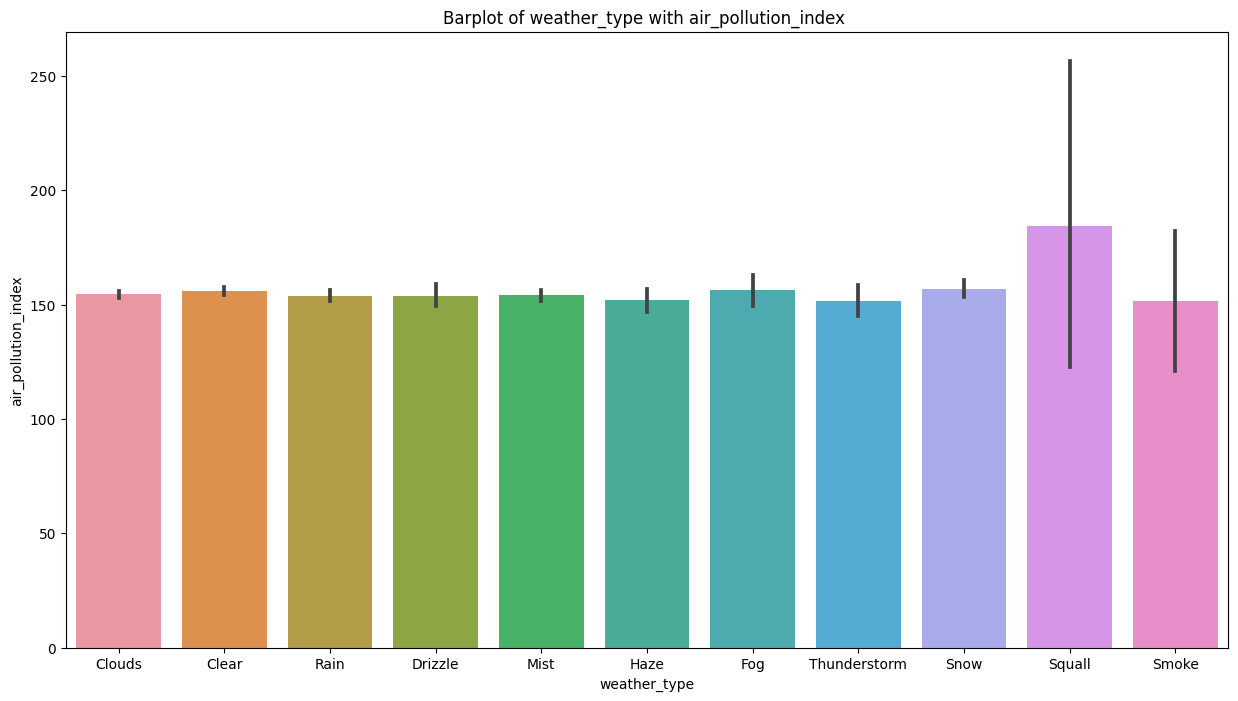

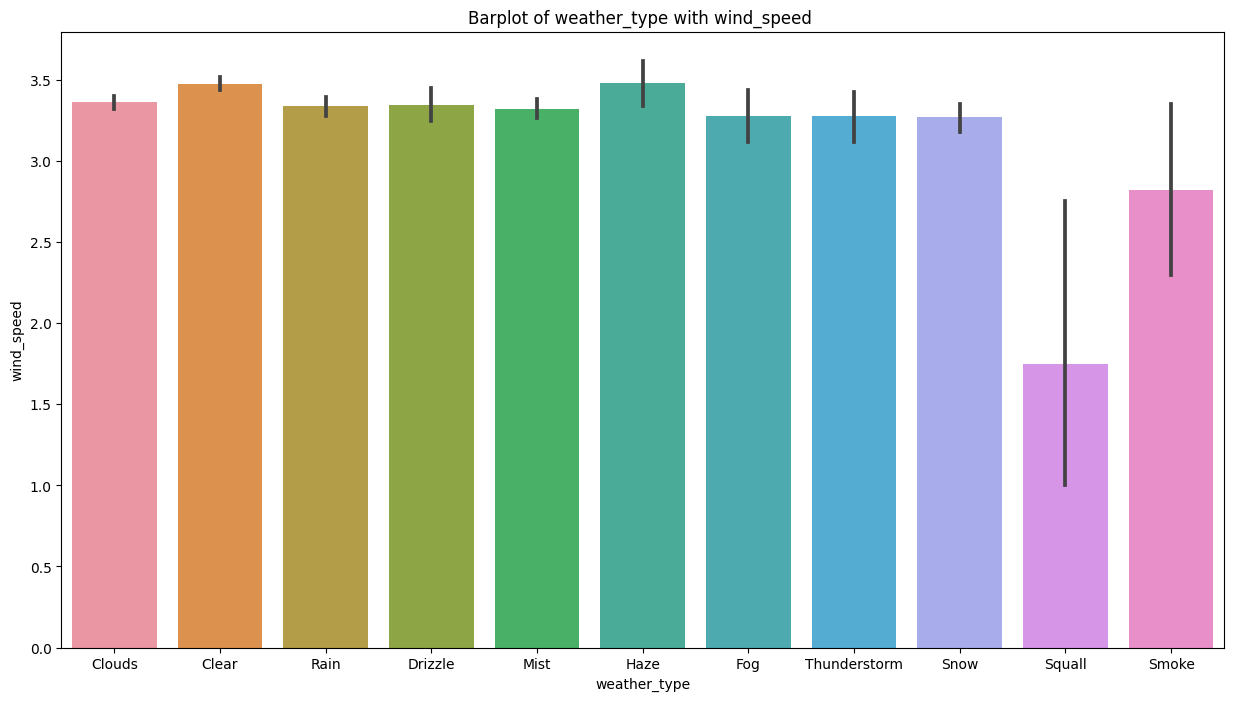

In [393]:
plt.figure(figsize=(15, 8))
sns.barplot(x='weather_type',y='humidity', data=df)
plt.xlabel('Weather_Type')
plt.ylabel('humidity')
plt.title('Barplot of weather_type with humidity ')
plt.show()


plt.figure(figsize=(15, 8))
sns.barplot(x='weather_type',y='temperature', data=df)
plt.xlabel('Weather_Type')
plt.ylabel('temperature')
plt.title('Barplot of weather_type with temperature ')
plt.show()



plt.figure(figsize=(15, 8))
sns.barplot(x='weather_type',y='wind_direction', data=df)
plt.xlabel('weather_type')
plt.ylabel('wind_direction')
plt.title('Barplot of weather_type with wind_direction ')
plt.show()


plt.figure(figsize=(15, 8))
sns.barplot(x='weather_type',y='air_pollution_index', data=df)
plt.xlabel('weather_type')
plt.ylabel('air_pollution_index')
plt.title('Barplot of weather_type with air_pollution_index ')
plt.show()



plt.figure(figsize=(15, 8))
sns.barplot(x='weather_type',y='wind_speed', data=df)
plt.xlabel('weather_type')
plt.ylabel('wind_speed')
plt.title('Barplot of weather_type with wind_speed ')
plt.show()


**Smoke Weather Type**

**Criteria**: Wind direction more than 200.

**Observation**: Smoke weather type is associated with wind directions exceeding 200 degrees.

**High Air Pollution Weather Type**

**Criteria**: High air pollution compared to squall.

**Observation**: Weather types with high air pollution levels are more prevalent than squall.


**Squall Weather Type**
**Criteria**: Low wind speed in squall weather type.

**Observation**: Squall weather type is characterized by low wind speeds.


**High Incidence Weather Types: Squall, Smoke, Thunderstorm**

**Criteria**: cloud, clear weather types have high occurrences.



**Humanity vs. Squall Weather Type**

**Comparison**: Squall weather type has a high impact on humanity.

**Observation**: Squall weather types are more disruptive or impactful on human activities compared to other weather types.

In [394]:
df.head(1)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545


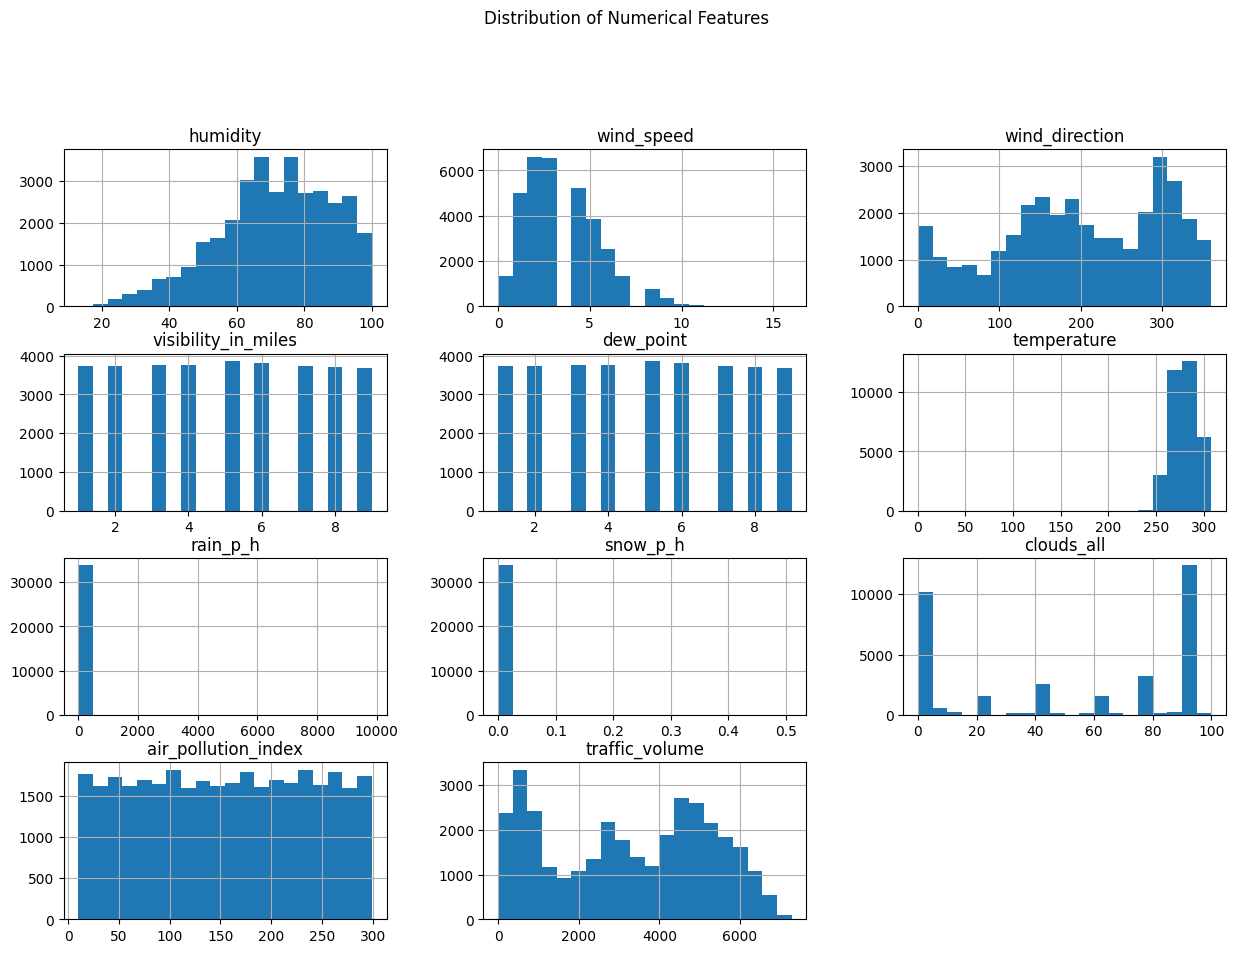

In [395]:
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()

In [396]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df['month'] = df['date_time'].dt.month

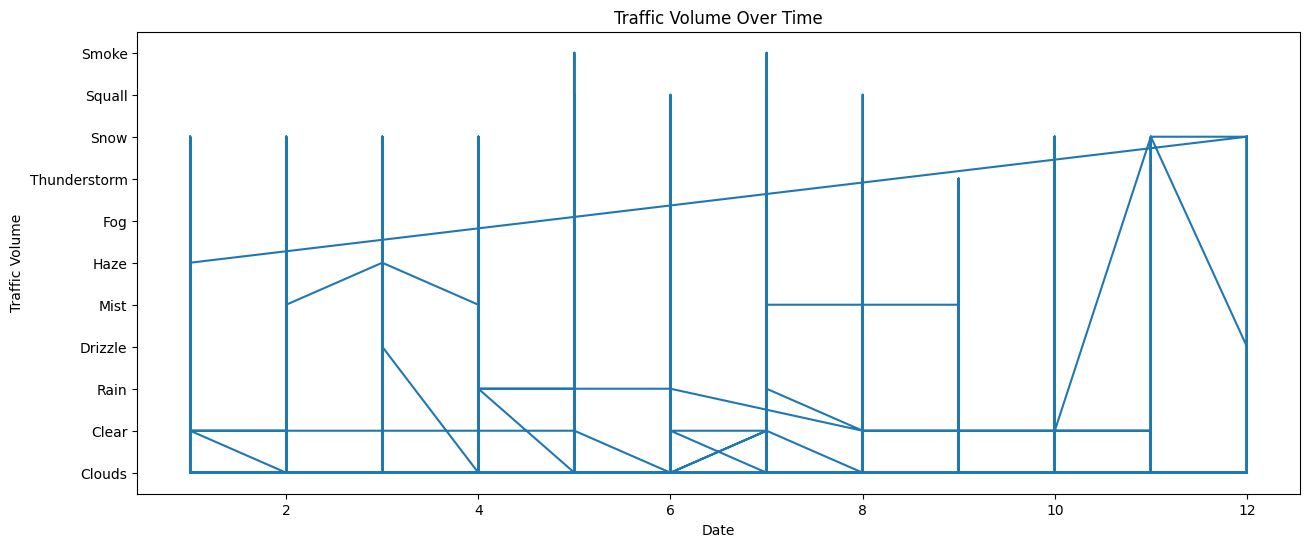

In [397]:
plt.figure(figsize=(15, 6))
plt.plot(df['month'], df['weather_type'])
plt.title("Traffic Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.show()

In [398]:
plt.figure(figsize=(15, 6))
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='is_holiday', ylabel='count'>

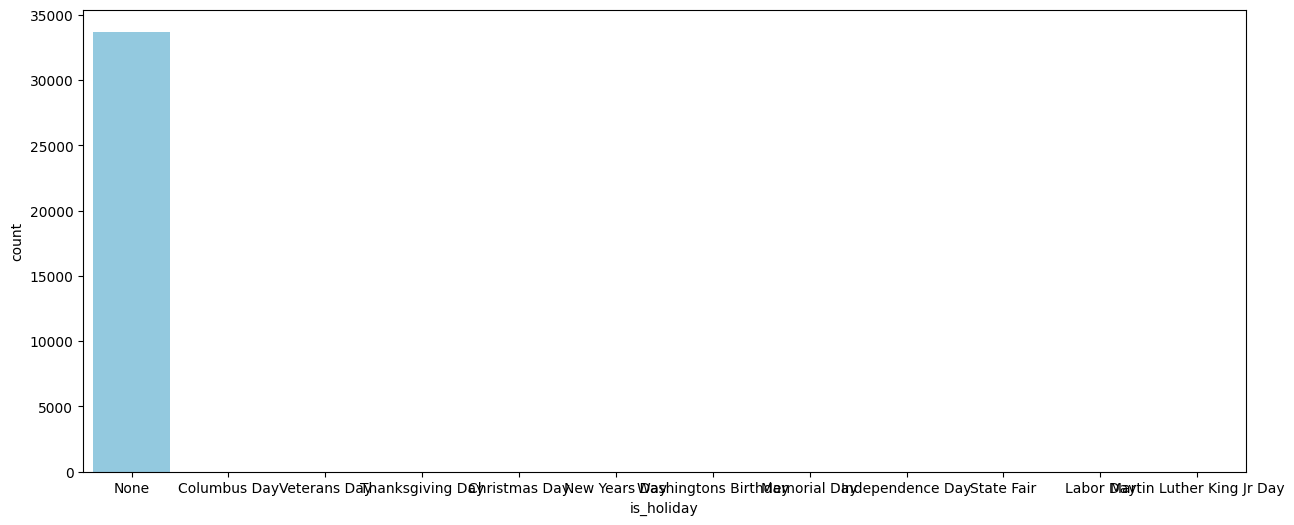

In [399]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df['is_holiday'],color='skyblue')

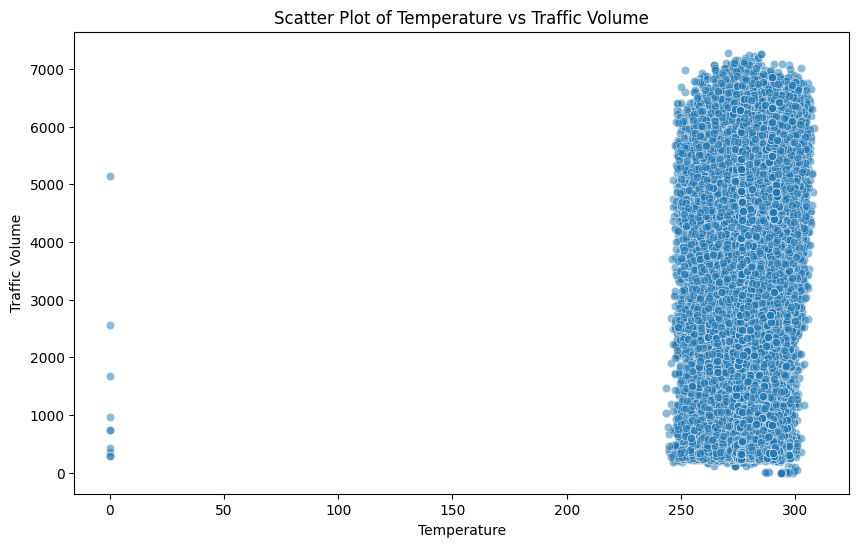

In [400]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='traffic_volume', data=df, alpha=0.5)
plt.title("Scatter Plot of Temperature vs Traffic Volume")
plt.xlabel("Temperature")
plt.ylabel("Traffic Volume")
plt.show()

# Data Processing

In [401]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume,month
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545,10
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516,10
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767,10
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026,10
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918,10


In [402]:
df.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume,month
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163,6.407674
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289,3.543241
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000,3.000000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000,6.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000,10.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000,12.000000


In [403]:
corr=df.corr()

<ipython-input-403-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

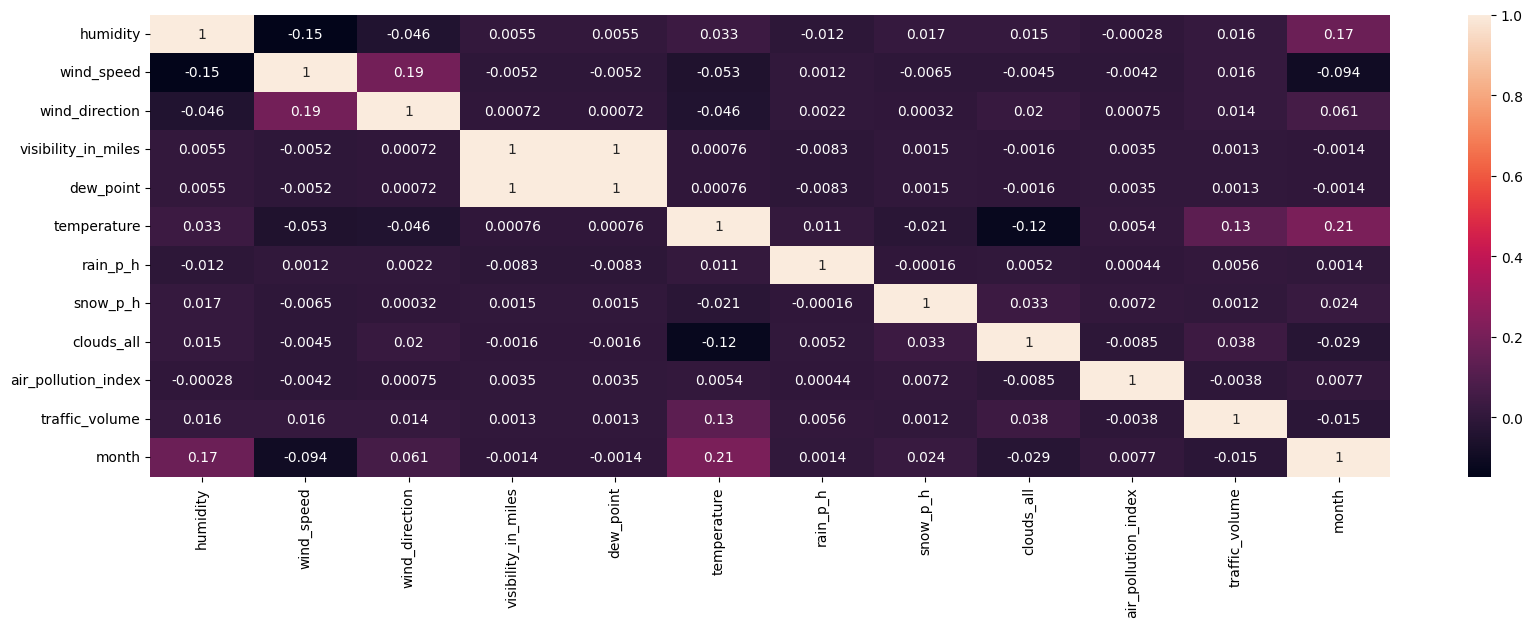

In [404]:
plt.figure(figsize=(20, 6))
sns.heatmap(corr,annot=True,color='skyblue')

<Axes: >

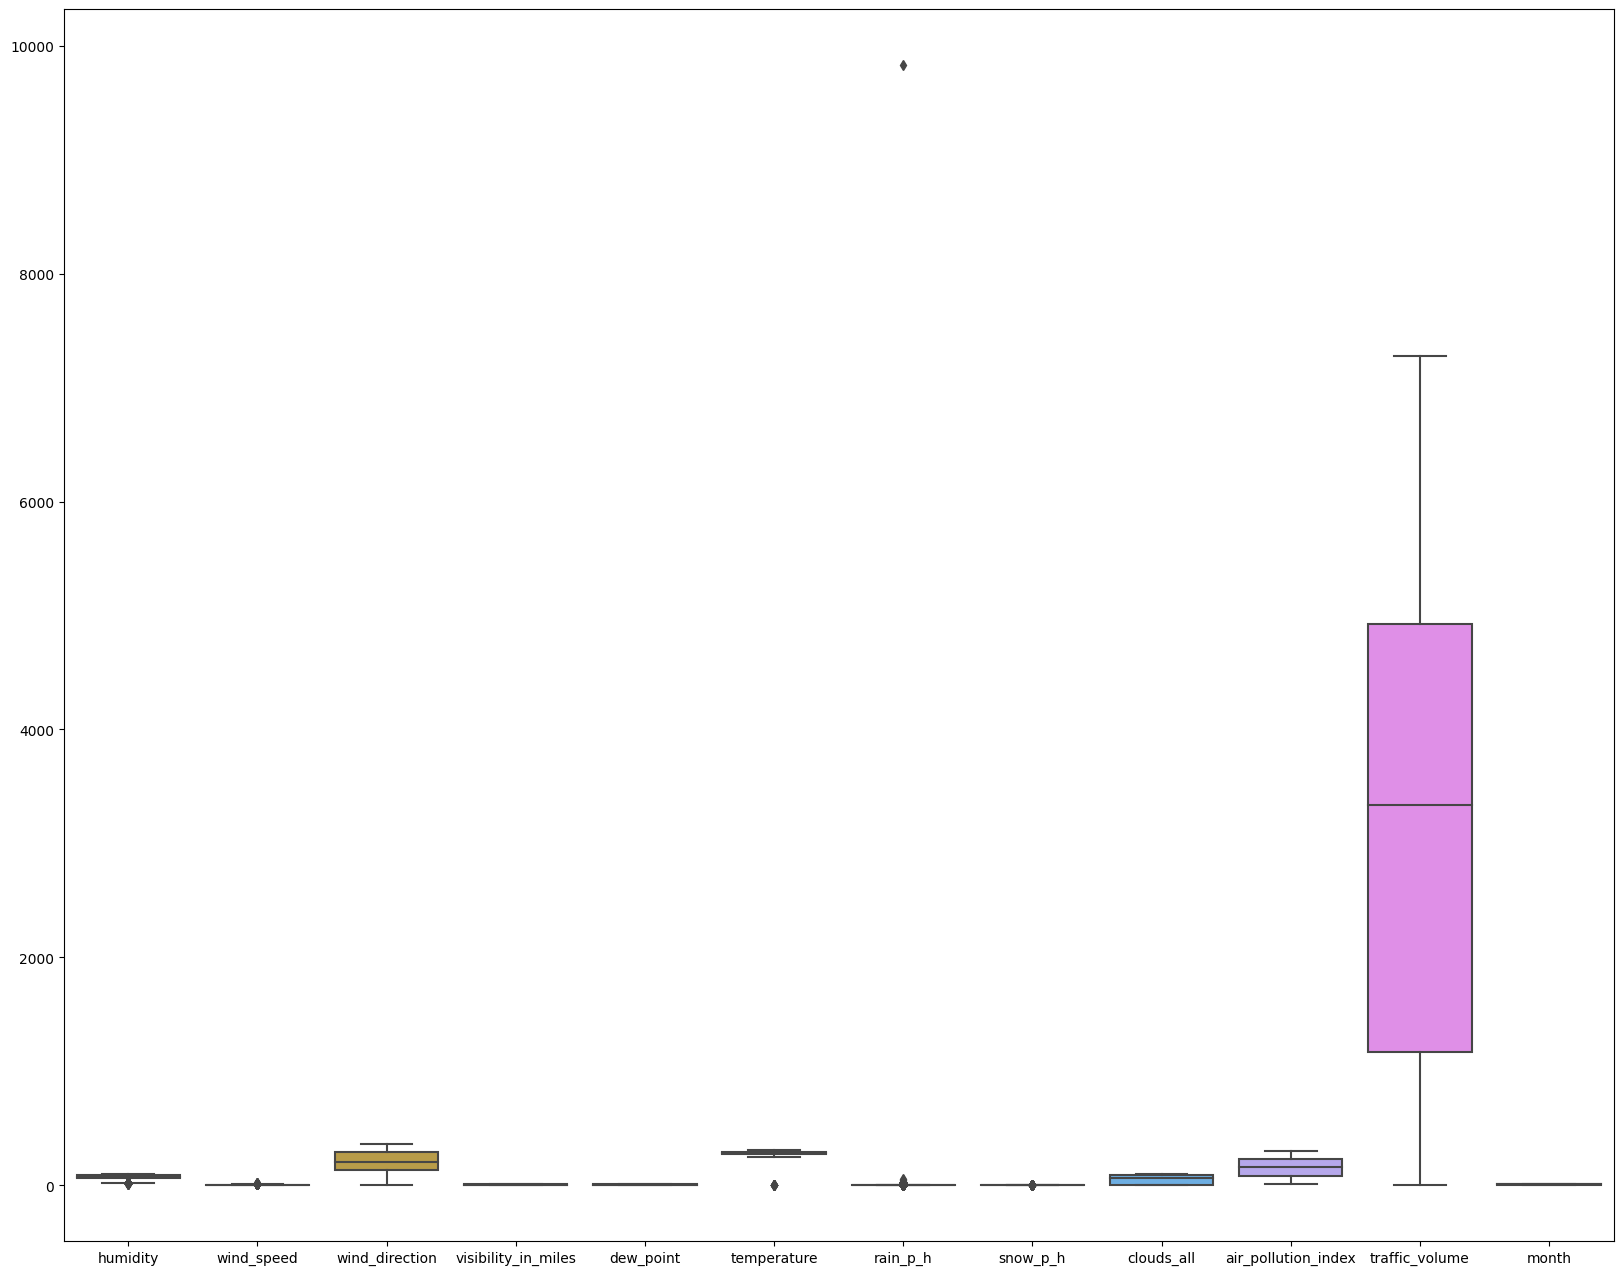

In [405]:
plt.figure(figsize=(20, 16))
sns.boxplot(df)

# Converting Object to Numerical Values

In [406]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume,month
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545,10
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516,10
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767,10
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026,10
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918,10


In [407]:
df.drop('is_holiday',inplace=True,axis=1)

In [408]:
df.drop('month',inplace=True,axis=1)
df.drop('date_time',inplace=True,axis=1)

In [409]:
df.head()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


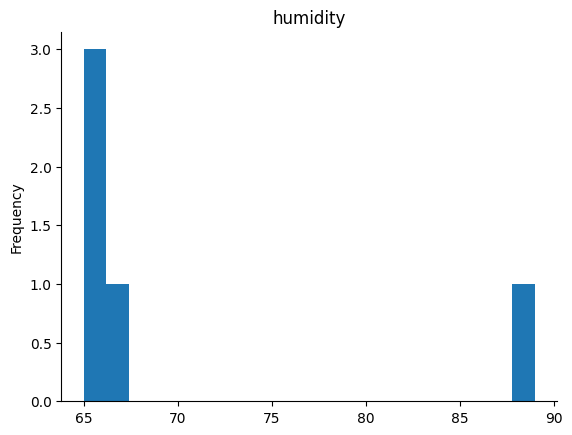

In [410]:
from matplotlib import pyplot as plt
_df_0['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [411]:
df['weather_type'].value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

In [412]:
df

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
33745,85,1,328,7,7,287.88,0.0,0.0,90,Mist,74,2348
33746,70,1,24,2,2,286.95,0.0,0.0,90,Rain,81,2194
33747,70,1,24,1,1,286.95,0.0,0.0,90,Mist,138,2194
33748,66,1,42,6,6,285.75,0.0,0.0,90,Rain,229,1328


In [413]:
df['weather_type'] = df['weather_type'].map({
    'Clouds': 0,
    'Clear': 1,
    'Mist': 2,
    'Rain': 3,
    'Snow': 4,
    'Drizzle': 5,
    'Haze': 6,
    'Fog': 7,
    'Thunderstorm': 8,
    'Smoke': 9,
    'Squall': 10
})

In [414]:
df['weather_type'].value_counts()

0     11213
1      9233
2      4047
3      3940
4      2070
5      1204
6       902
7       567
8       553
9        17
10        4
Name: weather_type, dtype: int64

In [415]:
print(len(df))

33750


# Split Data

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X=df.drop(['weather_type'],axis=1)
y=df['weather_type']

# Standard Scaler


In [418]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [419]:
Standard_scaler=StandardScaler()
Min_scaler=MinMaxScaler()

In [420]:
standard_scaler = StandardScaler()
X_scaler_standard = standard_scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
X_scaler_max = min_max_scaler.fit_transform(X)

In [421]:
X_scaler_standard

array([[ 1.05572004, -0.67040489,  1.29736234, ..., -0.26906286,
        -0.40415257,  1.15738423],
       [-0.2497631 , -0.18396715,  1.3073784 , ...,  0.63134766,
         0.27657226,  0.64067732],
       [-0.30910324, -0.18396715,  1.29736234, ...,  1.01723789,
        -0.4996929 ,  0.76671564],
       ...,
       [-0.07174267, -1.15684263, -1.75753746, ...,  1.01723789,
        -0.20112938, -0.52530271],
       [-0.30910324, -1.15684263, -1.57724829, ...,  1.01723789,
         0.88564185, -0.96016003],
       [-0.48712367, -1.15684263, -1.72748926, ...,  1.01723789,
        -0.17724429, -0.96016003]])

In [422]:
X_scaler_max

array([[0.87356322, 0.125     , 0.91388889, ..., 0.4       , 0.38408304,
        0.76167582],
       [0.62068966, 0.1875    , 0.91666667, ..., 0.75      , 0.58131488,
        0.62032967],
       [0.6091954 , 0.1875    , 0.91388889, ..., 0.9       , 0.35640138,
        0.65480769],
       ...,
       [0.65517241, 0.0625    , 0.06666667, ..., 0.9       , 0.44290657,
        0.30137363],
       [0.6091954 , 0.0625    , 0.11666667, ..., 0.9       , 0.75778547,
        0.18241758],
       [0.57471264, 0.0625    , 0.075     , ..., 0.9       , 0.44982699,
        0.18241758]])

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler_standard, y, test_size=0.2, random_state=42,stratify=y)

In [424]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape


((27000, 11), (6750, 11), (27000,), (6750,))

In [443]:
from sklearn.model_selection import RandomizedSearchCV

In [444]:
rndom_lr={'penalty':['l1','l2'],'C':[1.0,2.0,0.1,0.4,3.0],'solver':['lbfgs','sag','cg']}

In [445]:
random_lr=RandomizedSearchCV(estimator=lr,param_distributions=rndom_lr,cv=5)

In [446]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [436]:
dtc=DecisionTreeClassifier()
lr=LogisticRegression(multi_class='multinomial',)
rfc=RandomForestClassifier()
gnb=GaussianNB()
gbc=GradientBoostingClassifier()
adc=AdaBoostClassifier()
xgb=XGBClassifier()
svm = SVC(C=1, kernel='linear')

In [447]:
for model in [random_lr,dtc,rfc,gnb,gbc,adc,xgb,svm]:
  print(model,'......................................................')
  abc=model.fit(X_train,y_train)
  Y_pred_train=abc.predict(X_train)
  Y_pred_test=abc.predict(X_test)
  As_train=accuracy_score(Y_pred_train,y_train)
  As_test=accuracy_score(Y_pred_test,y_test)
  cm = confusion_matrix(Y_pred_test, y_test)
  cr = classification_report(Y_pred_test, y_test)






  print("training Accuracy score \n", As_train)
  print("=========="*3)
  print("testing Accuracy score \n", As_test)
  print("=========="*3)
  print("Confusion matrix \n", cm)
  print("=========="*3)
  print("CLASSIFICATION REPORT \n", cr)
  print("=========="*3)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial'),
                   param_distributions={'C': [1.0, 2.0, 0.1, 0.4, 3.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'sag', 'cg']}) ......................................................


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter wa

training Accuracy score 
 0.6065925925925926
testing Accuracy score 
 0.6053333333333333
Confusion matrix 
 [[2114    9  608  614  375  223  137   77   60    2    0]
 [  12 1838  135   60   16    6   36   33    9    1    0]
 [   0    0    1    0    1    0    0    1    0    0    0]
 [  62    0   56  111    0   12    0    1   42    0    1]
 [  55    0    9    3   22    0    7    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.94      0.50      0.65      4219
           1       1.00      0.86      0.92      2146
           2       0.00      0.33      0.00         3
           3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 1.0
testing Accuracy score 
 0.5740740740740741
Confusion matrix 
 [[1625    2  169  134  139   48   56   21   27    1    0]
 [   1 1633   81   15   15    4   22   15    6    1    0]
 [ 204  113  159  152   96   55   41   37   15    1    0]
 [ 126   26  132  292   19   76   11   10   41    0    0]
 [ 131   12   92   31  103   14   25   13    0    0    0]
 [  53    4   67   80    8   29    5    4    8    0    0]
 [  66   37   41   19   24    3   15    3    3    0    0]
 [  18   15   44   13   10    4    3    8    0    0    0]
 [  18    4   24   52    0    7    1    2   11    0    1]
 [   1    1    0    0    0    1    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      2222
           1       0.88      0.91      0.90      1793
           2       0.20      0.18      0.19       873
           3       0.37    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

training Accuracy score 
 1.0
testing Accuracy score 
 0.6651851851851852
Confusion matrix 
 [[2079    5  304  253  212   85   97   30   42    1    0]
 [   0 1840  126   21   16    5   33   29    7    1    0]
 [  62    0  109   81   79   50   18   28   12    0    0]
 [  43    2  140  368   15   84    7   11   49    1    1]
 [  52    0   84   20   82    7   22   13    0    0    0]
 [   7    0   27   30    3    8    0    1    0    0    0]
 [   0    0    5    1    5    1    2    0    0    0    0]
 [   0    0    6    1    2    0    0    1    0    0    0]
 [   0    0    8   13    0    1    0    0    1    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78      3108
           1       1.00      0.89      0.94      2078
           2       0.13      0.25      0.17       439
           3       0.47    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 0.07225925925925926
testing Accuracy score 
 0.07051851851851852
Confusion matrix 
 [[  28    0   23   89    9   24    2    7    1    0    0]
 [   0  108   11    1    2    0    2    4    0    0    0]
 [  34    0    8   19    1    2    1    0    1    0    0]
 [ 998  953  207  267    1   63   48   32   66    2    0]
 [ 134   37   48   18   60    6   12    8    0    0    0]
 [   0    0    2    2    0    1    0    0    0    0    0]
 [   0    0   12   40    0    6    2    2    3    0    0]
 [   0    0    1   17    4    1    0    1    0    0    0]
 [   0    0    1    1    0    0    0    0    0    0    0]
 [1049  749  496  334  337  138  113   59   40    1    1]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.01      0.15      0.02       183
           1       0.06      0.84      0.11       128
           2       0.01      0.12      0.02        66
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 0.6005925925925926
testing Accuracy score 
 0.597925925925926
Confusion matrix 
 [[2243    9  658  714  398  234  144   80   90    2    1]
 [   0 1775  131   56   16    6   36   33    8    1    0]
 [   0   63    4    4    0    0    0    0    1    0    0]
 [   0    0   16   14    0    1    0    0   12    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.49      0.66      4573
           1       0.96      0.86      0.91      2062
           2       0.00      0.06      0.01        72
           3 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 0.8343333333333334
testing Accuracy score 
 0.6648888888888889
Confusion matrix 
 [[2037    3  326  261  209   97   87   32   43    1    0]
 [   0 1842  124   21   16    5   33   29    7    1    0]
 [  77    1  116   74   75   36   17   21    9    0    0]
 [  45    0  126  376   14   82   13   19   46    1    1]
 [  73    0   78   16   96    7   27    9    0    0    0]
 [   9    0   22   23    1   12    1    1    0    0    0]
 [   2    0    2    0    3    0    2    1    0    0    0]
 [   0    1    4    0    0    1    0    1    0    0    0]
 [   0    0   11   16    0    1    0    0    6    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      3096
           1       1.00      0.89      0.94      2078
           2       0.14      0.27      0.19       426
           3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [440]:
df['weather_type'].value_counts()

0     11213
1      9233
2      4047
3      3940
4      2070
5      1204
6       902
7       567
8       553
9        17
10        4
Name: weather_type, dtype: int64

In [439]:
pd.DataFrame(confusion_matrix(Y_pred_test, y_test))

,0,1,2,3,4,5,6,7,8,9,10
0,2197,9,632,681,393,233,144,76,80,2,1
1,46,1838,137,65,16,6,36,35,11,1,0
2,0,0,3,3,2,0,0,1,0,0,0
3,0,0,35,38,0,2,0,0,20,0,0
4,0,0,2,1,3,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


In [448]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler_max, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
dtc=DecisionTreeClassifier()
lr=LogisticRegression(multi_class='multinomial',)
rfc=RandomForestClassifier()
gnb=GaussianNB()
gbc=GradientBoostingClassifier()
adc=AdaBoostClassifier()
xgb=XGBClassifier()
svm = SVC(C=1, kernel='linear')

In [461]:
for model in [random_lr,dtc,rfc,gnb,gbc,adc,xgb,svm]:
  print(model,'......................................................')
  abc=model.fit(X_train,y_train)
  Y_pred_train=abc.predict(X_train)
  Y_pred_test=abc.predict(X_test)
  As_train=accuracy_score(Y_pred_train,y_train)
  As_test=accuracy_score(Y_pred_test,y_test)
  cm = confusion_matrix(Y_pred_test, y_test)
  cr = classification_report(Y_pred_test, y_test)






  print("training Accuracy score \n", As_train)
  print("=========="*3)
  print("testing Accuracy score \n", As_test)
  print("=========="*3)
  print("Confusion matrix \n", cm)
  print("=========="*3)
  print("CLASSIFICATION REPORT \n", cr)
  print("=========="*3)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial'),
                   param_distributions={'C': [1.0, 2.0, 0.1, 0.4, 3.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'sag', 'cg']}) ......................................................


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

training Accuracy score 
 0.6
testing Accuracy score 
 0.5983703703703703
Confusion matrix 
 [[2144    9  650  677  390  232  143   78   76    2    1]
 [  15 1838  136   60   16    6   36   33    9    1    0]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [  62    0   20   50    0    3    0    1   26    0    0]
 [  22    0    3    1    7    0    1    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.96      0.49      0.65      4402
           1       1.00      0.85      0.92      2150
           2       0.00      0.00      0.00         1
           3       0.06    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

training Accuracy score 
 1.0
testing Accuracy score 
 0.6638518518518518
Confusion matrix 
 [[2068    6  320  255  214   97   97   33   44    1    0]
 [   0 1840  127   21   16    5   33   30    7    1    0]
 [  54    0   90   67   66   35   18   19    7    0    0]
 [  50    1  149  377   21   88    9   17   52    1    1]
 [  64    0   84   19   95    5   21   11    0    0    0]
 [   6    0   23   35    0    9    0    1    1    0    0]
 [   1    0    2    2    2    1    1    1    0    0    0]
 [   0    0    5    0    0    0    0    1    0    0    0]
 [   0    0    9   12    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.92      0.66      0.77      3135
           1       1.00      0.88      0.94      2080
           2       0.11      0.25      0.15       356
           3       0.48    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 0.577962962962963
testing Accuracy score 
 0.5737777777777778
Confusion matrix 
 [[2243    9  662  716  398  234  144   80   94    2    1]
 [   0 1594  108   49   15    5   33   27    8    1    0]
 [   0  201   22    9    1    1    2    5    1    0    0]
 [   0   29   16   14    0    1    1    0    8    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0   11    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.49      0.66      4583
           1       0.86      0.87      0.86      1840
           2       0.03      0.09      0.04       242
           3 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training Accuracy score 
 0.8641203703703704
testing Accuracy score 
 0.6543703703703704
Confusion matrix 
 [[1990    3  322  267  210   93   98   30   52    1    0]
 [   0 1840  122   21   16    5   32   30    7    1    0]
 [  78    3  108   72   69   43   15   17    4    0    0]
 [  65    0  134  366   18   83    9   18   42    1    1]
 [  93    0   79   17   94    5   23   13    0    0    0]
 [  14    0   23   26    1    9    1    2    0    0    0]
 [   2    1    3    1    5    0    1    0    0    0    0]
 [   1    0    5    2    1    2    0    3    0    0    0]
 [   0    0   13   15    0    1    0    0    6    0    0]
 [   0    0    0    1    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.89      0.65      0.75      3066
           1       1.00      0.89      0.94      2074
           2       0.13      0.26      0.18       409
           3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
